In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [174]:
data = pd.read_csv("/Users/alekseyvalouev/Desktop/FireData/CSV/final_table_shifted.csv")

data = data.dropna(axis=0, subset=['fut1fire'])

In [175]:
data

,newID,Date,YYYYMM,VPD,PPT,TMAX,Fire,fut1fire
0,1,1999-01-01,199901,5.318143,289.466287,12.153000,0,0.0
1,1,1999-02-01,199902,4.519571,508.476711,10.698429,0,0.0
2,1,1999-03-01,199903,5.311428,309.567858,11.620428,0,0.0
3,1,1999-04-01,199904,7.304143,82.425429,13.764143,0,0.0
4,1,1999-05-01,199905,5.658571,119.406572,14.522286,0,0.0
...,...,...,...,...,...,...,...,...
1217963,4517,2021-08-01,202108,24.241250,1.711850,29.326550,0,0.0
1217964,4517,2021-09-01,202109,21.749450,8.002600,27.934199,0,0.0
1217965,4517,2021-10-01,202110,22.783499,27.762850,24.977949,0,0.0
1217966,4517,2021-11-01,202111,22.209550,0.000000,24.351800,0,0.0


In [176]:
data = data[pd.to_datetime(data['Date']).dt.strftime('%B') == 'June']

In [177]:
array = data.values

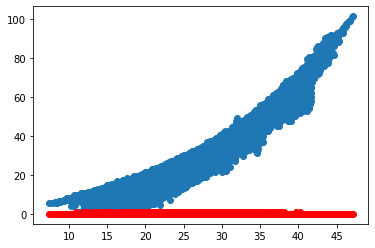

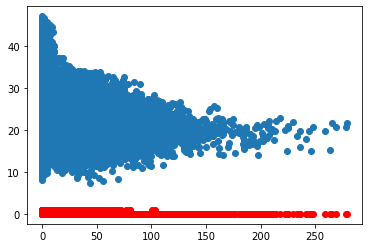

In [178]:
plt.clf()
plt.scatter(data['TMAX'], data['VPD'])
plt.scatter(data['TMAX'], data['fut1fire'], c='red')
plt.show()
plt.clf()
plt.scatter(data['PPT'], data['TMAX'])
plt.scatter(data['PPT'], data['fut1fire'], c='red')
plt.show()

In [179]:
array

array([[1, '1999-06-01', 199906, ..., 16.55842876434326, 0, 0.0],
       [1, '2000-06-01', 200006, ..., 17.454571178981237, 0, 0.0],
       [1, '2001-06-01', 200106, ..., 17.932857377188547, 0, 0.0],
       ...,
       [4517, '2019-06-01', 201906, ..., 25.501999855041504, 0, 0.0],
       [4517, '2020-06-01', 202006, ..., 26.536999702453613, 0, 0.0],
       [4517, '2021-06-01', 202106, ..., 26.24650001525879, 0, 0.0]],
      dtype=object)

In [180]:
X = array[:,3:6]
y = array[:,7]

In [181]:
y

array([0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0], dtype=object)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_train = X_train.astype('float')

y_train = y_train.astype('bool')

X_test = X_test.astype('float')

y_test = y_test.astype('bool')

In [184]:
from imblearn.over_sampling import BorderlineSMOTE 

In [185]:
X_train_res, y_train_res = BorderlineSMOTE().fit_resample(X_train, y_train)

In [197]:
# Making predictions using scikit learn
from sklearn.linear_model import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
#import sklearn.ensemble.RandomForestClassifier

In [198]:
# Create an instance and fit the model 
lr_model = RandomForestClassifier()
lr_model.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [199]:
'''# Making predictions
y_pred_sk = lr_model.predict(X_test)
plt.clf()
plt.scatter([i[1] for i in X_test], y_test)
plt.show()

plt.clf()
plt.scatter([i[1] for i in X_test], y_pred_sk, c="red")
plt.show()

plt.clf()
plt.scatter([i[1] for i in X_test], y_test)
plt.scatter([i[1] for i in X_test], y_pred_sk, c="red")
plt.show()'''

'# Making predictions\ny_pred_sk = lr_model.predict(X_test)\nplt.clf()\nplt.scatter([i[1] for i in X_test], y_test)\nplt.show()\n\nplt.clf()\nplt.scatter([i[1] for i in X_test], y_pred_sk, c="red")\nplt.show()\n\nplt.clf()\nplt.scatter([i[1] for i in X_test], y_test)\nplt.scatter([i[1] for i in X_test], y_pred_sk, c="red")\nplt.show()'

In [200]:
# Accuracy
print(f"Accuracy = {lr_model.score(X_test, y_test)}")

Accuracy = 0.9326148217728778


In [201]:
# X_train

In [202]:
# y_train

In [203]:
# data[:10]

In [204]:
# data.describe()

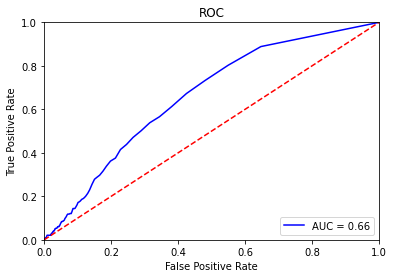

In [205]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()